# Rede Neural Recorrente usando dados da Bolsa de valores


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv("petr4_treinamento.csv")

In [3]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [4]:
base = base.dropna()


# Base de Treinamento usando a coluna Open do dataset

In [5]:
base_treinamento = base.iloc[:, 1:2].values

### Vamos aplicar a normalização dos dados para que a rede neural recorrente seja mais rápida no treinamento

In [11]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_train_norm = normalizador.fit_transform(base_treinamento)

## Estrutura da base de dados para a rede neural recorrente

In [35]:
previsores = []
preco_real = []

for i in range(90, 1242):

    previsores.append(base_train_norm[i-90:i, 0])
    preco_real.append(base_train_norm[i,0])
    
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))



In [36]:
previsores.shape[0:3]

(1152, 90, 1)

## Implementação da estrutura da rede eural recorrente para fazer a previsão 

In [42]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation="linear"))



In [43]:
regressor.compile(optimizer="rmsprop",
                  loss="mean_squared_error",
                 metrics=["mean_absolute_error"])

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 50)            30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [44]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 17s 218ms/step - loss: 0.0717 - mean_absolute_error: 0.2015
Epoch 2/100
36/36 [==============================] - 9s 257ms/step - loss: 0.0156 - mean_absolute_error: 0.0955
Epoch 3/100
36/36 [==============================] - 9s 253ms/step - loss: 0.0125 - mean_absolute_error: 0.0864
Epoch 4/100
36/36 [==============================] - 8s 221ms/step - loss: 0.0105 - mean_absolute_error: 0.0801
Epoch 5/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0113 - mean_absolute_error: 0.0812
Epoch 6/100
36/36 [==============================] - 8s 217ms/step - loss: 0.0086 - mean_absolute_error: 0.0708
Epoch 7/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0077 - mean_absolute_error: 0.0661
Epoch 8/100
36/36 [==============================] - 8s 224ms/step - loss: 0.0096 - mean_absolute_error: 0.0717
Epoch 9/100
36/36 [==============================] - 8s 222ms/step - loss: 0.0082 - mean_absolute_error

36/36 [==============================] - 12s 339ms/step - loss: 0.0019 - mean_absolute_error: 0.0328
Epoch 74/100
36/36 [==============================] - 12s 344ms/step - loss: 0.0015 - mean_absolute_error: 0.0304
Epoch 75/100
36/36 [==============================] - 11s 301ms/step - loss: 0.0016 - mean_absolute_error: 0.0295
Epoch 76/100
36/36 [==============================] - 11s 304ms/step - loss: 0.0018 - mean_absolute_error: 0.0315
Epoch 77/100
36/36 [==============================] - 12s 323ms/step - loss: 0.0017 - mean_absolute_error: 0.0320
Epoch 78/100
36/36 [==============================] - 13s 351ms/step - loss: 0.0017 - mean_absolute_error: 0.0312
Epoch 79/100
36/36 [==============================] - 13s 372ms/step - loss: 0.0019 - mean_absolute_error: 0.0323
Epoch 80/100
36/36 [==============================] - 10s 278ms/step - loss: 0.0017 - mean_absolute_error: 0.0304
Epoch 81/100
36/36 [==============================] - 10s 285ms/step - loss: 0.0017 - mean_absolute_e

# Previsão dos preço da Ação

In [45]:
base_test = pd.read_csv("petr4_teste.csv")
preco_real_teste = base_test.iloc[:, 1:2].values

base_completa = pd.concat((base["Open"], base_test["Open"]), axis=0)

In [47]:
base_completa.shape[0]

1264

In [48]:
entradas = base_completa[len(base_completa) - len(base_test) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)


x_test = []
for i in range(90, 112):
    x_test.append(entradas[i-90:i, 0])
x_test = np.array(x_test)


In [49]:
print(x_test)

[[0.47141473 0.46317829 0.46463178 ... 0.57122093 0.57655039 0.57655039]
 [0.46317829 0.46463178 0.45203488 ... 0.57655039 0.57655039 0.5809109 ]
 [0.46463178 0.45203488 0.46753876 ... 0.57655039 0.5809109  0.59544574]
 ...
 [0.55232558 0.56153101 0.56492248 ... 0.68895349 0.73352713 0.74709307]
 [0.56153101 0.56492248 0.55717054 ... 0.73352713 0.74709307 0.7495155 ]
 [0.56492248 0.55717054 0.54118217 ... 0.74709307 0.7495155  0.75436047]]


In [50]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
previsoes = regressor.predict(x_test)
previsoes = normalizador.inverse_transform(previsoes)

In [52]:
print(previsoes)

[[15.90841 ]
 [15.9595  ]
 [16.17458 ]
 [16.470715]
 [16.526424]
 [16.52033 ]
 [16.710629]
 [16.749247]
 [16.692533]
 [16.765518]
 [17.004517]
 [17.125761]
 [17.50851 ]
 [17.978994]
 [18.095053]
 [18.03271 ]
 [18.09865 ]
 [18.16453 ]
 [18.80427 ]
 [19.269314]
 [19.362066]
 [19.408428]]


In [53]:
previsoes.mean()

17.42412

In [54]:
preco_real_teste.mean()

17.87454563636364

In [57]:
preco_real_teste.mean() - previsoes.mean()

0.45042568702281827

## Plotando os gráficos dos preços reais e estimado pela rede neural

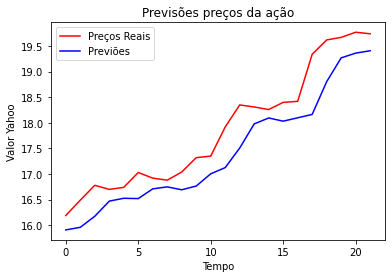

In [61]:
plt.plot(preco_real_teste, color="red", label="Preços Reais")
plt.plot(previsoes, color="blue", label="Previões")
plt.title("Previsões preços da ação")
plt.xlabel("Tempo")
plt.ylabel("Valor Yahoo")
plt.legend()
plt.show()